<a href="https://colab.research.google.com/github/fduartej/forecasting-food/blob/main/Forecasting_food.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Forecasting Food**

Resumen

El presente trabajo tiene como objetivo la creacion de un modelo de regresion de ML para el prediccion de la comida (forecasting food)

In [1]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
# imports
from nltk.corpus import stopwords 
import re
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


meal_info = pd.read_csv('meal_info.csv') #comidas
fulfilment_center_info = pd.read_csv('fulfilment_center_info.csv') # centros de preparacion de comidas
train_file = pd.read_csv('train.csv') #historica_data
test_file = pd.read_csv('test_QoiMO9B.csv') #data de entrenamiento

df=test_file.copy()
print(df.head())

        id  week  center_id  meal_id  checkout_price  base_price  \
0  1028232   146         55     1885          158.11      159.11   
1  1127204   146         55     1993          160.11      159.11   
2  1212707   146         55     2539          157.14      159.14   
3  1082698   146         55     2631          162.02      162.02   
4  1400926   146         55     1248          163.93      163.93   

   emailer_for_promotion  homepage_featured  
0                      0                  0  
1                      0                  0  
2                      0                  0  
3                      0                  0  
4                      0                  0  


Preprocesamiento

In [4]:
#merge fulfilment_center_info into train

train_df = pd.merge(train_file,fulfilment_center_info, on='center_id')
test_df= pd.merge(df,fulfilment_center_info, on='center_id')



In [5]:
#merge meal_info into train 

train_df = pd.merge(train_df,meal_info, on='meal_id')
test_df = pd.merge(test_df,meal_info, on='meal_id')

In [6]:
train_df.tail()
test_df.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,region_code,center_type,op_area,category,cuisine
0,1028232,146,55,1885,158.11,159.11,0,0,647,56,TYPE_C,2.0,Beverages,Thai
1,1262649,147,55,1885,159.11,159.11,0,0,647,56,TYPE_C,2.0,Beverages,Thai
2,1453211,149,55,1885,157.14,158.14,0,0,647,56,TYPE_C,2.0,Beverages,Thai
3,1262599,150,55,1885,159.14,157.14,0,0,647,56,TYPE_C,2.0,Beverages,Thai
4,1495848,151,55,1885,160.11,159.11,0,0,647,56,TYPE_C,2.0,Beverages,Thai


In [7]:
encoder=LabelEncoder()
encoder2=LabelEncoder()
encoder3=LabelEncoder()

In [8]:
#datos principales
main_data=train_df.copy()
main_data


,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai
1,1018704,2,55,1885,135.83,152.29,0,0,323,647,56,TYPE_C,2.0,Beverages,Thai
2,1196273,3,55,1885,132.92,133.92,0,0,96,647,56,TYPE_C,2.0,Beverages,Thai
3,1116527,4,55,1885,135.86,134.86,0,0,163,647,56,TYPE_C,2.0,Beverages,Thai
4,1343872,5,55,1885,146.50,147.50,0,0,215,647,56,TYPE_C,2.0,Beverages,Thai
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456543,1437396,141,61,2104,583.03,630.53,0,1,13,473,77,TYPE_A,4.5,Fish,Continental
456544,1060716,142,61,2104,581.03,582.03,0,0,42,473,77,TYPE_A,4.5,Fish,Continental
456545,1029231,143,61,2104,583.03,581.03,0,0,40,473,77,TYPE_A,4.5,Fish,Continental
456546,1141147,144,61,2104,582.03,581.03,0,0,53,473,77,TYPE_A,4.5,Fish,Continental


In [9]:
# convertir nominales a numericos
main_data['category']=encoder.fit_transform(main_data['category'])
main_data['center_type']=encoder2.fit_transform(main_data['center_type'])
main_data['cuisine']=encoder3.fit_transform(main_data['cuisine'])
main_data

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,2,2.0,0,3
1,1018704,2,55,1885,135.83,152.29,0,0,323,647,56,2,2.0,0,3
2,1196273,3,55,1885,132.92,133.92,0,0,96,647,56,2,2.0,0,3
3,1116527,4,55,1885,135.86,134.86,0,0,163,647,56,2,2.0,0,3
4,1343872,5,55,1885,146.50,147.50,0,0,215,647,56,2,2.0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456543,1437396,141,61,2104,583.03,630.53,0,1,13,473,77,0,4.5,4,0
456544,1060716,142,61,2104,581.03,582.03,0,0,42,473,77,0,4.5,4,0
456545,1029231,143,61,2104,583.03,581.03,0,0,40,473,77,0,4.5,4,0
456546,1141147,144,61,2104,582.03,581.03,0,0,53,473,77,0,4.5,4,0


In [10]:
main_data.dropna()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,2,2.0,0,3
1,1018704,2,55,1885,135.83,152.29,0,0,323,647,56,2,2.0,0,3
2,1196273,3,55,1885,132.92,133.92,0,0,96,647,56,2,2.0,0,3
3,1116527,4,55,1885,135.86,134.86,0,0,163,647,56,2,2.0,0,3
4,1343872,5,55,1885,146.50,147.50,0,0,215,647,56,2,2.0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456543,1437396,141,61,2104,583.03,630.53,0,1,13,473,77,0,4.5,4,0
456544,1060716,142,61,2104,581.03,582.03,0,0,42,473,77,0,4.5,4,0
456545,1029231,143,61,2104,583.03,581.03,0,0,40,473,77,0,4.5,4,0
456546,1141147,144,61,2104,582.03,581.03,0,0,53,473,77,0,4.5,4,0


In [11]:
main_data.describe()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
count,4.565480e+05,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.00000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000
mean,1.250096e+06,74.768771,82.105796,2024.337458,332.238933,354.156627,0.081152,0.10920,261.872760,601.553399,56.614566,0.642342,4.083590,5.257443,1.561961
std,1.443548e+05,41.524956,45.975046,547.420920,152.939723,160.715914,0.273069,0.31189,395.922798,66.195914,17.641306,0.816105,1.091686,4.459965,1.101974
min,1.000000e+06,1.000000,10.000000,1062.000000,2.970000,55.350000,0.000000,0.00000,13.000000,456.000000,23.000000,0.000000,0.900000,0.000000,0.000000
25%,1.124999e+06,39.000000,43.000000,1558.000000,228.950000,243.500000,0.000000,0.00000,54.000000,553.000000,34.000000,0.000000,3.600000,0.000000,1.000000
50%,1.250184e+06,76.000000,76.000000,1993.000000,296.820000,310.460000,0.000000,0.00000,136.000000,596.000000,56.000000,0.000000,4.000000,5.000000,2.000000
75%,1.375140e+06,111.000000,110.000000,2539.000000,445.230000,458.870000,0.000000,0.00000,324.000000,651.000000,77.000000,1.000000,4.500000,9.000000,3.000000
max,1.499999e+06,145.000000,186.000000,2956.000000,866.270000,866.270000,1.000000,1.00000,24299.000000,713.000000,93.000000,2.000000,7.000000,13.000000,3.000000


Analisis de la Data

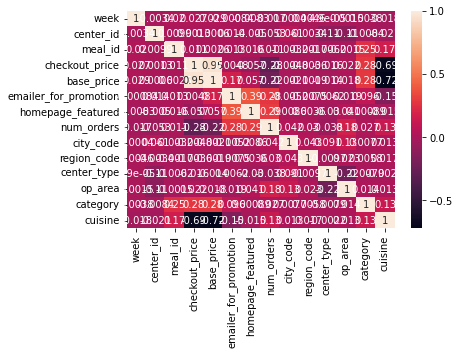

In [12]:
#Correlacion de variables buscar (variable dependiente numero de ordenes y las variables independientes)
main_data1= main_data.drop(['id'], axis=1)
correlation = main_data1.corr(method='pearson')
columns = correlation.nlargest(8, 'num_orders').index
columns
sns.heatmap(correlation,annot=True)
sns.set(font_scale=2)
plt.show()

Train validation split

In [13]:
features = columns.drop(['num_orders'])

#main_data = main_data[np.isfinite(main_data).all(0.1)]

main_data2 = main_data[features]
x = main_data2.values
y = main_data['num_orders'].values





In [14]:
x

array([[  0. ,   0. ,   2. , ..., 647. ,  56. ,   0. ],
       [  0. ,   0. ,   2. , ..., 647. ,  56. ,   0. ],
       [  0. ,   0. ,   2. , ..., 647. ,  56. ,   0. ],
       ...,
       [  0. ,   0. ,   4.5, ..., 473. ,  77. ,   4. ],
       [  0. ,   0. ,   4.5, ..., 473. ,  77. ,   4. ],
       [  0. ,   0. ,   4.5, ..., 473. ,  77. ,   4. ]])

In [15]:
y

array([177, 323,  96, ...,  40,  53,  27])

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)
print(f'Train shape     : {x_train.shape}')
print(f'Validation shape: {x_test.shape}')

Train shape     : (342411, 7)
Validation shape: (114137, 7)


In [17]:
test_data=test_df.copy()
test_data.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,region_code,center_type,op_area,category,cuisine
0,1028232,146,55,1885,158.11,159.11,0,0,647,56,TYPE_C,2.0,Beverages,Thai
1,1262649,147,55,1885,159.11,159.11,0,0,647,56,TYPE_C,2.0,Beverages,Thai
2,1453211,149,55,1885,157.14,158.14,0,0,647,56,TYPE_C,2.0,Beverages,Thai
3,1262599,150,55,1885,159.14,157.14,0,0,647,56,TYPE_C,2.0,Beverages,Thai
4,1495848,151,55,1885,160.11,159.11,0,0,647,56,TYPE_C,2.0,Beverages,Thai


In [18]:
test_data['category']=encoder.fit_transform(test_data['category'])
test_data['center_type']=encoder2.fit_transform(test_data['center_type'])
test_data['cuisine']=encoder3.fit_transform(test_data['cuisine'])
test_data.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,region_code,center_type,op_area,category,cuisine
0,1028232,146,55,1885,158.11,159.11,0,0,647,56,2,2.0,0,3
1,1262649,147,55,1885,159.11,159.11,0,0,647,56,2,2.0,0,3
2,1453211,149,55,1885,157.14,158.14,0,0,647,56,2,2.0,0,3
3,1262599,150,55,1885,159.14,157.14,0,0,647,56,2,2.0,0,3
4,1495848,151,55,1885,160.11,159.11,0,0,647,56,2,2.0,0,3


In [19]:
test_data1=test_data.copy()
test_data1.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,region_code,center_type,op_area,category,cuisine
0,1028232,146,55,1885,158.11,159.11,0,0,647,56,2,2.0,0,3
1,1262649,147,55,1885,159.11,159.11,0,0,647,56,2,2.0,0,3
2,1453211,149,55,1885,157.14,158.14,0,0,647,56,2,2.0,0,3
3,1262599,150,55,1885,159.14,157.14,0,0,647,56,2,2.0,0,3
4,1495848,151,55,1885,160.11,159.11,0,0,647,56,2,2.0,0,3


In [20]:
test_data_final=test_data1.drop(columns=['id','center_id','meal_id','week','checkout_price','base_price','center_type'],axis=1)
test_data_final.head()

,emailer_for_promotion,homepage_featured,city_code,region_code,op_area,category,cuisine
0,0,0,647,56,2.0,0,3
1,0,0,647,56,2.0,0,3
2,0,0,647,56,2.0,0,3
3,0,0,647,56,2.0,0,3
4,0,0,647,56,2.0,0,3


## Usando LinearRegression

In [21]:
def score(m, x_train, y_train, x_test, y_test):
    print(f'Scores:')
    print(f'Train = {m.score(x_train, y_train):.4}')
    print(f'Test = {m.score(x_test, y_test):.4}')

In [22]:
from sklearn.linear_model import LinearRegression

m = LinearRegression()
m.fit(x_train, y_train)
score(m, x_train, y_train, x_test, y_test) 

Scores:
Train = 0.1747
Test = 0.1731


In [23]:
# Veamos el MSE  --- NIVEL DE ERROR ES ALTO
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train, m.predict(x_train)), mean_squared_error(y_test, m.predict(x_test))
# en base a los valores de nivel de error el modelo no muestra un nivel de confiabilidad

(128370.06849878456, 132601.08635098278)

In [24]:
x_train

array([[  0. ,   0. ,   3.4, ..., 683. ,  56. ,   0. ],
       [  0. ,   0. ,   3.6, ..., 614. ,  85. ,   9. ],
       [  1. ,   0. ,   7. , ..., 638. ,  56. ,  13. ],
       ...,
       [  0. ,   0. ,   5.6, ..., 685. ,  56. ,   0. ],
       [  0. ,   0. ,   3.5, ..., 604. ,  56. ,  13. ],
       [  1. ,   0. ,   3.9, ..., 638. ,  56. ,   5. ]])

In [25]:
#imp = pd.DataFrame({'col':x_train, 
#                    'importance':m.coef_}).sort_values(
#    'importance', ascending=False)
#imp.style.bar()

**Usando Decision Tree Regresor**

In [26]:
from sklearn.tree import DecisionTreeRegressor
DTR = DecisionTreeRegressor()
DTR.fit(x_train, y_train)
y_pred = DTR.predict(x_test)
y_pred

array([385.09677419, 128.95038168,  65.01503759, ..., 463.05395683,
        64.50566038, 165.14646465])

In [27]:
from sklearn.metrics import mean_squared_log_error
from sklearn import metrics
RMSEL=mean_squared_log_error(y_test, y_pred)
RMSEL=np.sqrt(RMSEL)
RMSEL

0.6295316002179667

Usando XGB Regressor

In [28]:
from xgboost import XGBRegressor
XG = XGBRegressor()
XG.fit(x_train, y_train)
y_pred = XG.predict(x_test)
y_pred[y_pred<0] = 0
RMSEL=mean_squared_log_error(y_test, y_pred)
RMSEL=np.sqrt(RMSEL)
print(RMSEL)

[04:59:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.9499640097480841


Usando Random Forest Regresor

In [29]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor()
RF.fit(x_train, y_train)
y_pred = RF.predict(x_test)
y_pred[y_pred<0] = 0
RMSEL=mean_squared_log_error(y_test, y_pred)
RMSEL=np.sqrt(RMSEL)
RMSEL

0.629484325058459

In [30]:
y=train_file['num_orders']
y

0         177
1         270
2         189
3          54
4          40
         ... 
456543     68
456544     42
456545    501
456546    729
456547    162
Name: num_orders, Length: 456548, dtype: int64

Usando Random LGBM Regressor

In [31]:
from lightgbm import LGBMRegressor,plot_importance
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_log_error,mean_squared_error
from sklearn.model_selection import GridSearchCV

In [32]:
from lightgbm import LGBMRegressor
lgb_model=LGBMRegressor(importance_type='gain')
lgbm_params = {
    "n_estimators":[230,260],
    "num_leaves":[41,51],
    'min_child_samples':[40,45,50],
    'random_state':[2019]
  
}
lgb_model.set_params(**lgbm_params)

LGBMRegressor(importance_type='gain', min_child_samples=[40, 45, 50],
              n_estimators=[230, 260], num_leaves=[41, 51],
              random_state=[2019])

In [33]:
lgb_grid=GridSearchCV(lgb_model,lgbm_params,cv=5,scoring='neg_mean_squared_error',n_jobs=8)

In [34]:
model=lgb_grid.fit(x_train,y_train)

In [35]:
lgb_estimate=model.best_estimator_
lgb_estimate

LGBMRegressor(importance_type='gain', min_child_samples=50, n_estimators=260,
              num_leaves=51, random_state=2019)

In [36]:
y_pred=model.predict(x_test)
y_pred

array([396.24319312, 116.54608316,  60.42639822, ..., 463.23949173,
        52.8740641 , 144.91169307])

In [37]:
y_pred[y_pred<0] = 0
RMSEL=mean_squared_log_error(y_test, y_pred)
RMSEL=np.sqrt(RMSEL)
RMSEL

0.648718370726868

In [38]:
test_data_final.head()

,emailer_for_promotion,homepage_featured,city_code,region_code,op_area,category,cuisine
0,0,0,647,56,2.0,0,3
1,0,0,647,56,2.0,0,3
2,0,0,647,56,2.0,0,3
3,0,0,647,56,2.0,0,3
4,0,0,647,56,2.0,0,3


In [39]:
main_data2.head()

,homepage_featured,emailer_for_promotion,op_area,cuisine,city_code,region_code,category
0,0,0,2.0,3,647,56,0
1,0,0,2.0,3,647,56,0
2,0,0,2.0,3,647,56,0
3,0,0,2.0,3,647,56,0
4,0,0,2.0,3,647,56,0


In [40]:
pred_test_data= RF.predict(test_data_final)
pred_test_data[pred_test_data<0] = 0
submit = pd.DataFrame({
    'id' :test_data['id'],
    'num_orders' : pred_test_data
})

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [41]:
submit.head()

#                          MSE = 0 cercano a cero el mejor
# Linear Regresor         0.1747
# RandonForest Regressor  0.6293979818653586
# Decision Tree Regressor 0.6295561380700941
# XBoost Resgressor       0.9499640097480841

,id,num_orders
0,1028232,737.771184
1,1262649,737.771184
2,1453211,737.771184
3,1262599,737.771184
4,1495848,737.771184


In [42]:
#platos
test_df.loc[(test_df['id']==1028232) | (test_df['id']==1262649) | (test_df['id']==1453211) | (test_df['id']==1262599) | (test_df['id']==1495848) ]

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,region_code,center_type,op_area,category,cuisine
0,1028232,146,55,1885,158.11,159.11,0,0,647,56,TYPE_C,2.0,Beverages,Thai
1,1262649,147,55,1885,159.11,159.11,0,0,647,56,TYPE_C,2.0,Beverages,Thai
2,1453211,149,55,1885,157.14,158.14,0,0,647,56,TYPE_C,2.0,Beverages,Thai
3,1262599,150,55,1885,159.14,157.14,0,0,647,56,TYPE_C,2.0,Beverages,Thai
4,1495848,151,55,1885,160.11,159.11,0,0,647,56,TYPE_C,2.0,Beverages,Thai
